In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np

In [2]:
plt.style.use("../style.mplstyle")

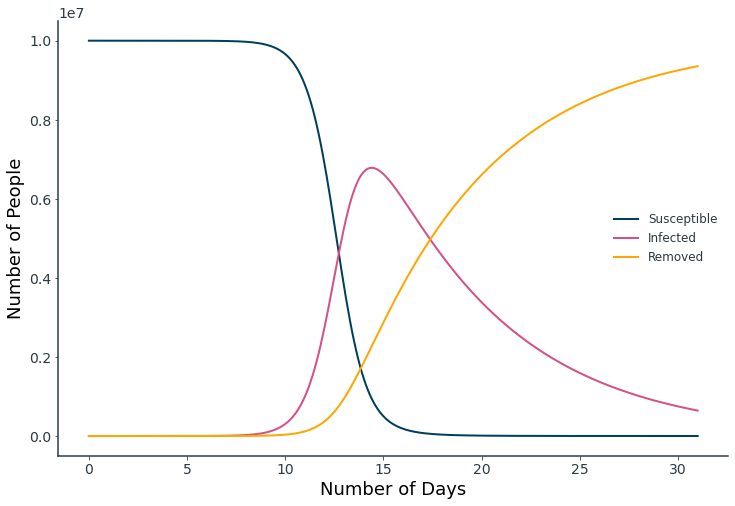

In [3]:
from Eir import SIR

sim = SIR(S0=9999999, I0=1, R0=0, beta=1.5, gamma=.15)
df, fig = sim.run(31, .1)
fig;

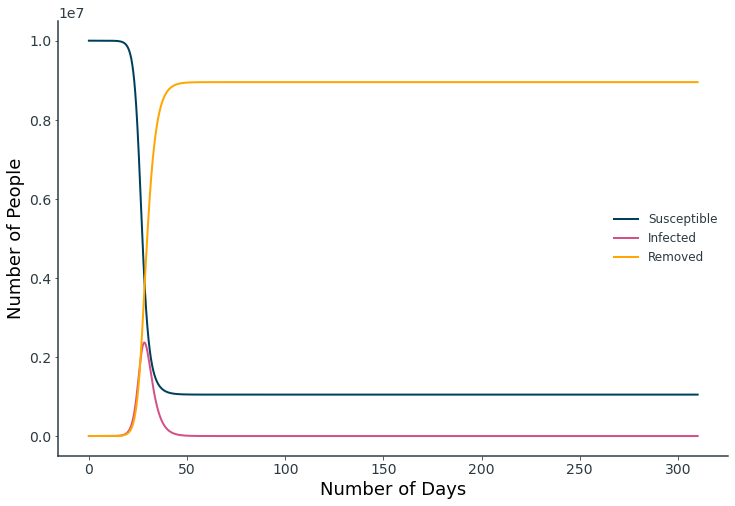

In [4]:
from Eir import SIR

sim = SIR(S0=9999999, I0=1, R0=0, beta=1, gamma=.4)
df, fig = sim.run(310, .1)
fig;

In [5]:
p = 0
for i in range(1, 20):
    p += 0.9**(i-1) * 0.1
    print(f"Day {i:2}: {p}")

Day  1: 0.1
Day  2: 0.19
Day  3: 0.271
Day  4: 0.34390000000000004
Day  5: 0.40951000000000004
Day  6: 0.46855900000000006
Day  7: 0.5217031000000001
Day  8: 0.5695327900000001
Day  9: 0.6125795110000001
Day 10: 0.6513215599000001
Day 11: 0.68618940391
Day 12: 0.7175704635190001
Day 13: 0.7458134171671001
Day 14: 0.7712320754503902
Day 15: 0.7941088679053512
Day 16: 0.8146979811148161
Day 17: 0.8332281830033345
Day 18: 0.849905364703001
Day 19: 0.8649148282327009


In [6]:
def step(s, i, r, beta, gamma, omega, N):
    x = beta * i * s / N
    y = gamma * i
    z = omega * i
    return -x, x-y, y, z

In [7]:
beta = 2
gamma = 0.1
omega = 0.01
S0 = 10000
I0 = 1000
R0 = 0
N = S0 + I0 + R0  # 11000
Vd = 150

s, i, r, d, v = S0, I0, R0, 0, 0

dt = 0.1

for dt in np.arange(0.1, 10, dt):
    print(f"{s:6,.0f} {i:6,.0f} {r:6,.0f} {d:6,.0f} {v:6,.0f}")
    f = step(s, i, r, beta, gamma, omega, N)
    if dt * Vd < s:
        v = v + dt * Vd
        s = s - dt * Vd
    s = s + dt * f[0]
    i = i + dt * f[1]
    r = r + dt * f[2]
    d = d + dt * f[3]
    N = N - dt * f[3]

10,000  1,000      0      0      0
 9,803  1,172     10      1     15
 9,355  1,566     33      3     45
 8,511  2,319     80      8     90
 7,015  3,662    173     17    150
 4,601  5,818    356     36    225
 1,581  8,398    705     71    315
  -225  9,512  1,293    129    420
    90  8,436  2,054    205    420
   -37  7,803  2,813    281    420
    17  6,970  3,594    359    420
    -7  6,227  4,360    436    420
     3  5,469  5,108    511    420
    -1  4,762  5,819    582    420
     0  4,094  6,485    649    420
    -0  3,481  7,100    710    420
     0  2,924  7,656    766    420
     0  2,427  8,153    815    420
     0  1,990  8,590    859    420
     0  1,612  8,968    897    420
     0  1,289  9,291    929    420
     0  1,019  9,561    956    420
     0    795  9,785    979    420
     0    612  9,968    997    420
     0    465 10,115  1,012    420
     0    349 10,231  1,023    420
     0    258 10,322  1,032    420
     0    188 10,392  1,039    420
     0    136 10,444